In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import re

# Read Data

In [2]:
dataset = pd.read_csv('./dataset/HzAGN_Groups_0_3_noMcut_InfallTime_matched.csv')

In [3]:
dataset.head()

,idgroup_1,relax,ID_1,id[1],Ra[2],Dec[3],z[4],zphot[5],zphotup[6],zphotdown[7],...,Rvir_deg,vsig,Rmax_deg,sigma_vz,sigma_vy,sigma_vx,rank_gg,offset,GroupID,GroupSize
0,3077,1,22,3553,-0.15976,-0.46951,0.99832,0.0,0.0,0.0,...,0.00785,254.1469,0.01259,198.174662,184.2864,135.84045,0,0.348211,1,9
1,3077,1,23,3554,-0.15756,-0.46617,0.99835,0.0,0.0,0.0,...,0.00785,284.0533,0.01259,198.174662,184.2864,135.84045,0,0.262511,1,9
2,3077,1,24,3560,-0.16319,-0.47106,0.99822,0.0,0.0,0.0,...,0.00785,208.1544,0.01259,198.174662,184.2864,135.84045,0,0.827232,1,9
3,3077,1,25,3561,-0.16792,-0.46637,0.99826,0.0,0.0,0.0,...,0.00785,265.0288,0.01259,198.174662,184.2864,135.84045,0,1.366920,1,9
4,3077,1,26,3793,-0.16778,-0.46684,0.99814,0.0,0.0,0.0,...,0.00785,222.6391,0.01259,198.174662,184.2864,135.84045,0,1.340197,1,9


In [4]:
dataset.tail()

,idgroup_1,relax,ID_1,id[1],Ra[2],Dec[3],z[4],zphot[5],zphotup[6],zphotdown[7],...,Rvir_deg,vsig,Rmax_deg,sigma_vz,sigma_vy,sigma_vx,rank_gg,offset,GroupID,GroupSize
45203,2285551,0,45857,2171798,-0.49292,-0.42343,2.00457,0.0,0.0,0.0,...,0.00527,372.1910,0.00981,127.498099,191.825297,225.736693,0,0.317573,2604,12
45204,2285551,0,45858,2171799,-0.49142,-0.42515,2.00458,0.0,0.0,0.0,...,0.00527,237.7404,0.00981,127.498099,191.825297,225.736693,0,0.115515,2604,12
45205,2285551,0,45859,2171800,-0.49119,-0.42541,2.00461,0.0,0.0,0.0,...,0.00527,176.4346,0.00981,127.498099,191.825297,225.736693,0,0.181381,2604,12
45206,2285551,0,45854,2171343,-0.49285,-0.42169,2.00457,0.0,0.0,0.0,...,0.00527,206.9181,0.00981,127.498099,191.825297,225.736693,1,0.603060,2604,12
45207,2285551,0,45856,2171376,-0.49183,-0.42467,2.00461,0.0,0.0,0.0,...,0.00527,241.9885,0.00981,127.498099,191.825297,225.736693,31,0.005689,2604,12


In [5]:
dataset.columns.tolist()

['idgroup_1',
 'relax',
 'ID_1',
 'id[1]',
 'Ra[2]',
 'Dec[3]',
 'z[4]',
 'zphot[5]',
 'zphotup[6]',
 'zphotdown[7]',
 'logMsim[8]',
 'logMphot[9]',
 'logMphup[10]',
 'logMphdown[11]',
 'SFRsim[12]',
 'logSFRphot[13]',
 'logSFRup[14]',
 'logSFRdown[15]',
 'agegal[16]',
 'velgal[17]',
 'rank[18]',
 'ngal[19]',
 'idgroup_2',
 'idgroup[20]',
 'Ragroup[21]',
 'Decgroup[22]',
 'zgroup[23]',
 'Mvirgroup[24]',
 'Mtotgroup[25]',
 'Rvir_deg[26]',
 'vsig[27]',
 'Rmax_deg[28]',
 'ID_2',
 'id_ligthcone[col1]',
 't(Myr)[col2]',
 'z_lightcone[col3]',
 'z_0[col4]',
 'snap_0[col5]',
 'snapm_0[col6]',
 'idgal_0[col7]',
 'idhalo_0[col8]',
 'Mh_0[col9]',
 'M*_0[col10]',
 'posx_0[col11]',
 'posy_0[col12]',
 'posz_0[col13]',
 'poshx_0[col14]',
 'poshy_0[col15]',
 'poshz_0[col16]',
 'SFR_0[col17]',
 'Rvirh_0[col18]',
 'Rvirg_0[col19]',
 'z_first[col20]',
 'snapm_first[col21]',
 'idgal_first[col22]',
 'idhalo_first[col23]',
 'Mh_first[col24]',
 'M*_first[col25]',
 'posx_first[col26]',
 'posy_first[col27]',
 

# Visulalize Features by Histogram

<p style="color:lighcyn;font-size:1.4em;">  In this section, I want to visualize some columns in the dataset by histogram to recognize the difference of similar titles.</p>

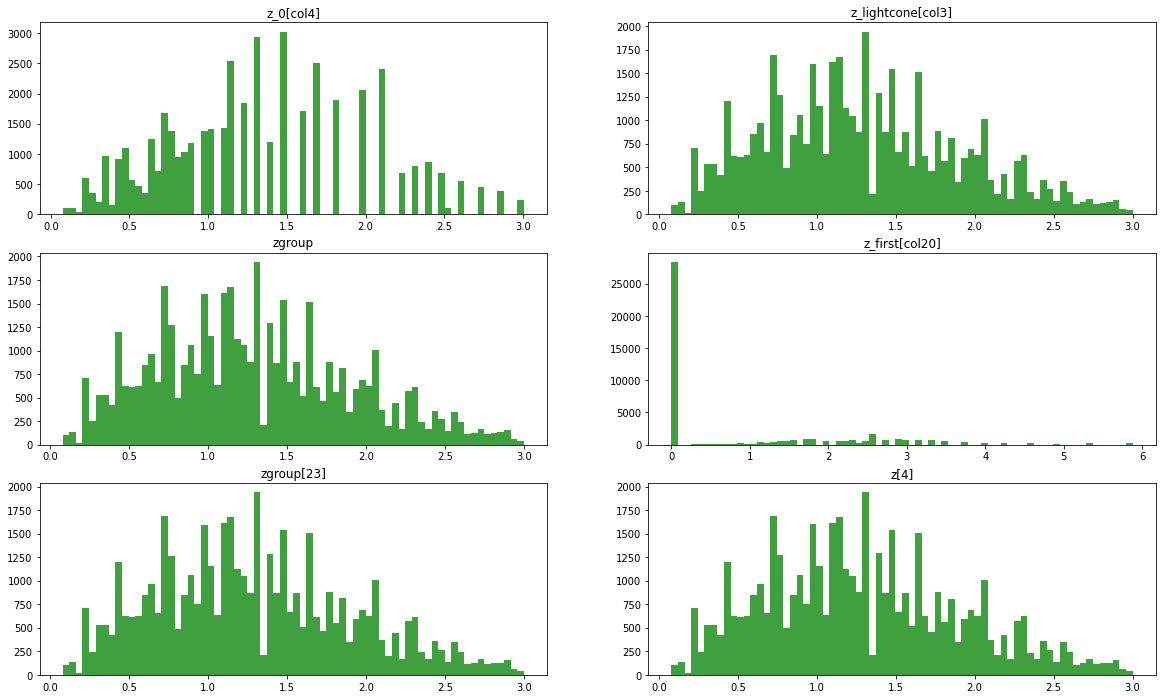

In [20]:
figure, axis = plt.subplots(3, 2, figsize=(20,12))
plt.figure(figsize=(20,15))

y1 = dataset['z_0[col4]']
y2 = dataset['z_lightcone[col3]']
y3 = dataset['zgroup']
y4 = dataset['z_first[col20]']
y5 = dataset['zgroup[23]']
y6 = dataset['z[4]']

y1_label = y1.name
y2_label = y2.name
y3_label = y3.name
y4_label = y4.name
y5_label = y5.name
y6_label = y6.name

axis[0, 0].hist(y1, bins=70, facecolor='g', alpha=0.75)
axis[0, 0].set_title(y1_label)
  
axis[0, 1].hist(y2, bins=70, facecolor='g', alpha=0.75)
axis[0, 1].set_title(y2_label)
  
axis[1, 0].hist(y3, bins=70, facecolor='g', alpha=0.75)
axis[1, 0].set_title(y3_label)
  
axis[1, 1].hist(y4, bins=70, facecolor='g', alpha=0.75)
axis[1, 1].set_title(y4_label)

axis[2, 0].hist(y5, bins=70, facecolor='g', alpha=0.75)
axis[2, 0].set_title(y5_label)

axis[2, 1].hist(y6, bins=70, facecolor='g', alpha=0.75)
axis[2, 1].set_title(y6_label)
 
plt.close()
plt.show()

<p style="color:lightcyan;font-size:1.3em;">
z_lightcone, zgroup, z are so similar or equal.
<br><br>
<b> How Do Astronomers Measure Redshift? </b>
<br>
The most accurate way to measure redshift is by using spectroscopy. When a beam of white light strikes a triangular prism it is separated into its various components (ROYGBIV). This is known as a spectrum (plural: spectra). Astronomers can look at the spectra created by different elements and compare these with the spectra of stars. If the absorption or emmission lines they see in the star's spectra are shifted, they know the object is moving either towards us or away from us.<br>
For far away objects such as quasars, some of which are too faint to be observed by spectroscopy, astronomers measure photometric redshifts. In this case they observe the peak brightness of the object through various filters. An object that is redshifted will have its peak brightness appear through filters towards the red end of the spectrum.<br>
Astronomers talk about redshift in terms of the redshift parameter z. This is calculated with an equation, where λobserved is the observed wavelength of a spectral line, and λrest is the wavelength that line would have if its source was not in motion:<br>
z = (λobserved - λrest) / λrest<br>
z tells you the number of years the light from the object has traveled to reach us, however this is not the distance to the object in light years, because the universe has been expanding as the light traveled and the object is now much farther away. 
</p>

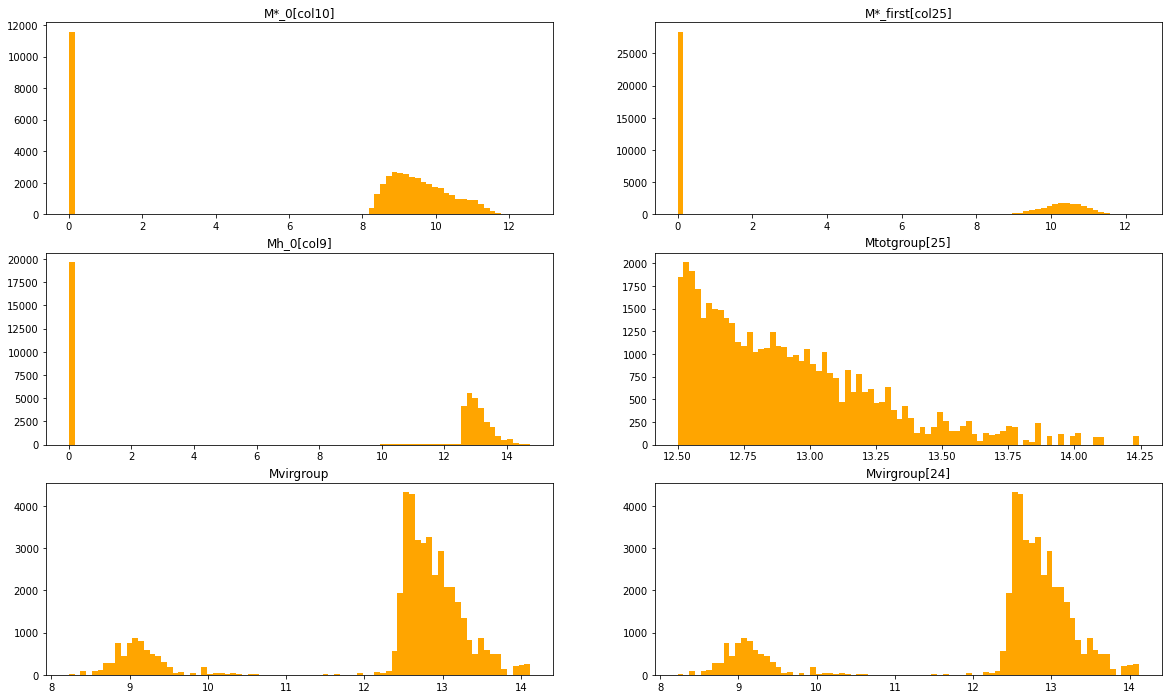

In [15]:
figure, axis = plt.subplots(3, 2, figsize=(20,12))
plt.figure(figsize=(20,15))

y1 = dataset['M*_0[col10]']
y2 = dataset['M*_first[col25]']
y3 = dataset['Mh_0[col9]']
y4 = dataset['Mtotgroup[25]']
y5 = dataset['Mvirgroup']
y6 = dataset['Mvirgroup[24]']

y1_label = y1.name
y2_label = y2.name
y3_label = y3.name
y4_label = y4.name
y5_label = y5.name
y6_label = y6.name

axis[0, 0].hist(y1, bins=80, facecolor='orange', alpha=1
)
axis[0, 0].set_title(y1_label)
  
axis[0, 1].hist(y2, bins=80, facecolor='orange', alpha=1
)
axis[0, 1].set_title(y2_label)
  
axis[1, 0].hist(y3, bins=80, facecolor='orange', alpha=1
)
axis[1, 0].set_title(y3_label)
  
axis[1, 1].hist(y4, bins=80, facecolor='orange', alpha=1
)
axis[1, 1].set_title(y4_label)

axis[2, 0].hist(y5, bins=80, facecolor='orange', alpha=1
)
axis[2, 0].set_title(y5_label)

axis[2, 1].hist(y6, bins=80, facecolor='orange', alpha=1
)
axis[2, 1].set_title(y6_label)
  
# Combine all the operations and display
plt.close()
plt.show()

<p >
<ol style="color:lightcyan;font-size:1.3em;">
<li>M* is stellar mass</li>
<li>Mtotgroup is <b>NOT</b> equal to Mvirgroup</li>
</ol>
</p>

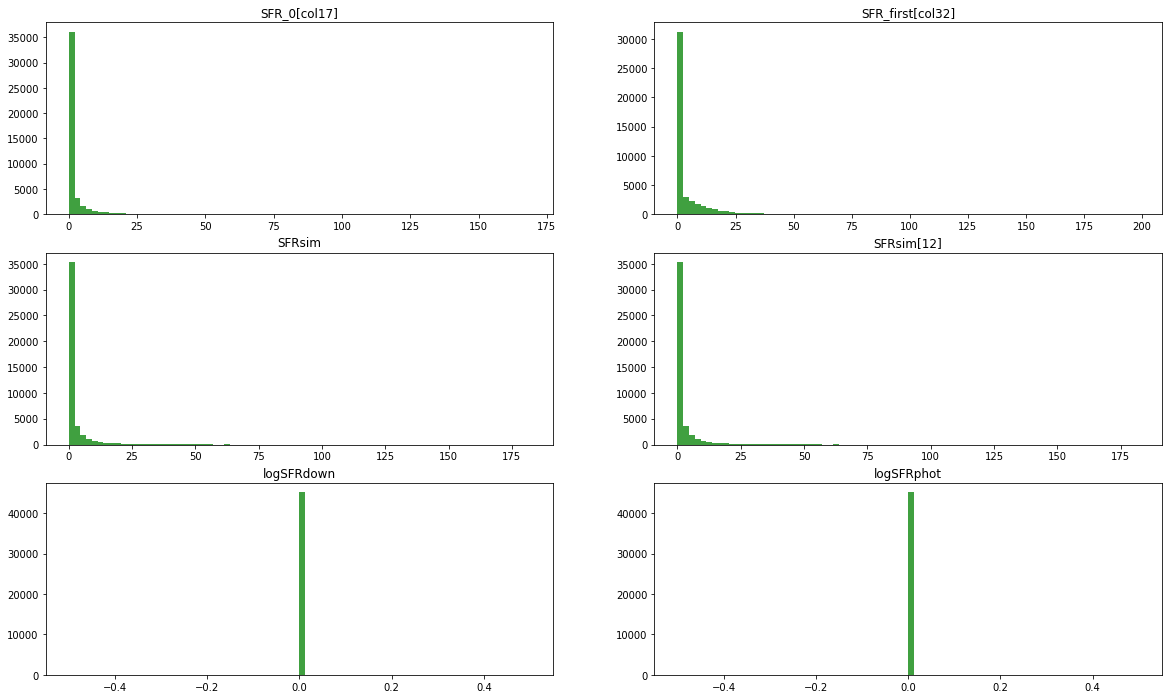

<Figure size 1440x1080 with 0 Axes>

In [55]:
figure, axis = plt.subplots(3, 2, figsize=(20,12))
plt.figure(figsize=(20,15))

y1 = dataset['SFR_0[col17]']
y2 = dataset['SFR_first[col32]']
y3 = dataset['SFRsim']
y4 = dataset['SFRsim[12]']
y5 = dataset['logSFRdown']
y6 = dataset['logSFRphot']

y1_label = y1.name
y2_label = y2.name
y3_label = y3.name
y4_label = y4.name
y5_label = y5.name
y6_label = y6.name

axis[0, 0].hist(y1, bins=80, facecolor='g', alpha=0.75)
axis[0, 0].set_title(y1_label)
  
axis[0, 1].hist(y2, bins=80, facecolor='g', alpha=0.75)
axis[0, 1].set_title(y2_label)
  
axis[1, 0].hist(y3, bins=80, facecolor='g', alpha=0.75)
axis[1, 0].set_title(y3_label)
  
axis[1, 1].hist(y4, bins=80, facecolor='g', alpha=0.75)
axis[1, 1].set_title(y4_label)

axis[2, 0].hist(y5, bins=80, facecolor='g', alpha=0.75)
axis[2, 0].set_title(y5_label)

axis[2, 1].hist(y6, bins=80, facecolor='g', alpha=0.75)
axis[2, 1].set_title(y6_label)
  
# Combine all the operations and display
plt.show()

# Plots with x-axis = z

Text(0, 0.5, 'SFR_0')

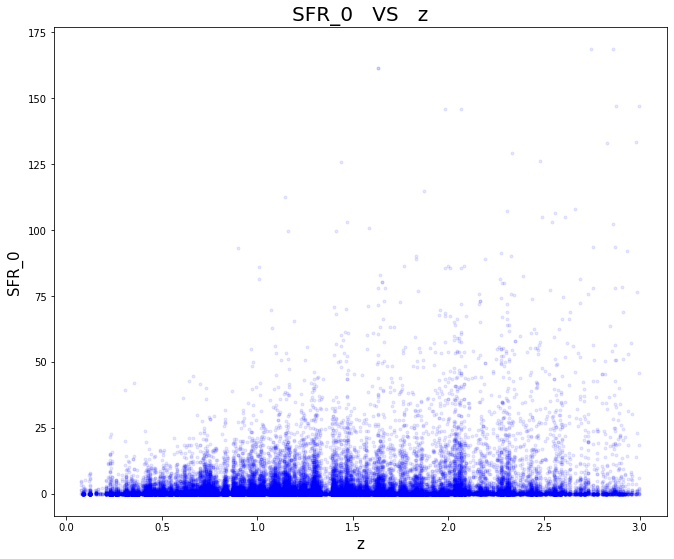

In [19]:
y = dataset['SFR_0[col17]']
x = dataset['z[4]']

x_label = x.name.split('[')[0]
y_label = y.name.split('[')[0]

plt.figure(figsize=(11,9))
plt.scatter(x,y, marker='.', c='blue', alpha=0.09)
plt.title(str(y_label)+'   VS   '+str(x_label), fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 
plt.ylabel(y_label, fontsize = 15)

Text(0, 0.5, 'SFR_first')

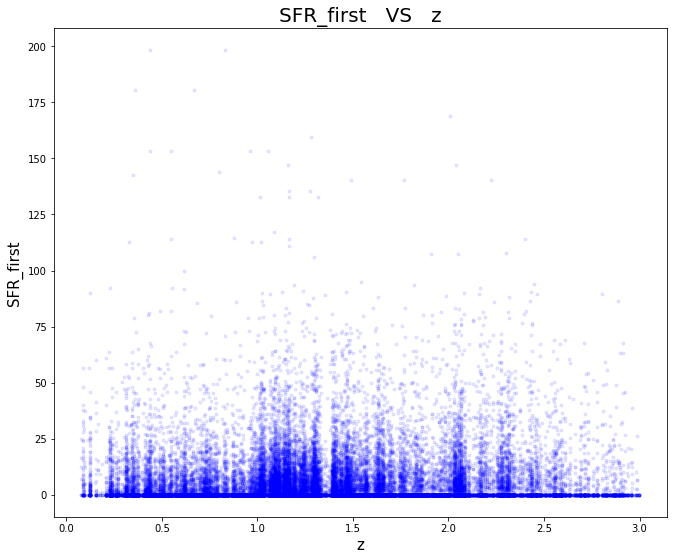

In [32]:
y = dataset['SFR_first[col32]']
x = dataset['z[4]']

x_label = x.name.split('[')[0]
y_label = y.name.split('[')[0]

plt.figure(figsize=(11,9))
plt.scatter(x,y, marker='.', c='blue', alpha=0.09)
plt.title(str(y_label)+'   VS   '+str(x_label), fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 
plt.ylabel(y_label, fontsize = 15)

Text(0, 0.5, 'SFR_0 - SFR_first')

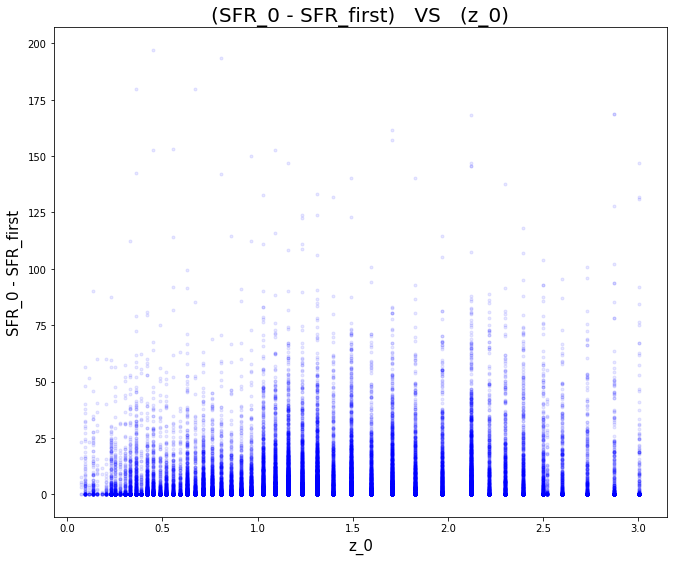

In [33]:
y1 = dataset['SFR_first[col32]']
y2 = dataset['SFR_0[col17]']
x = dataset['z_0[col4]']

x = x
y = np.abs(y2-y1)

x_label = x.name.split('[')[0]
y_label = y2.name.split('[')[0] + ' - ' + y1.name.split('[')[0]

plt.figure(figsize=(11,9))
plt.scatter(x,y, marker='.', c='blue', alpha=0.09)
plt.title('(' + str(y_label)+')   VS   ('+ str(x_label) + ')', fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 
plt.ylabel(y_label, fontsize = 15)

Text(0, 0.5, 'Mh_0')

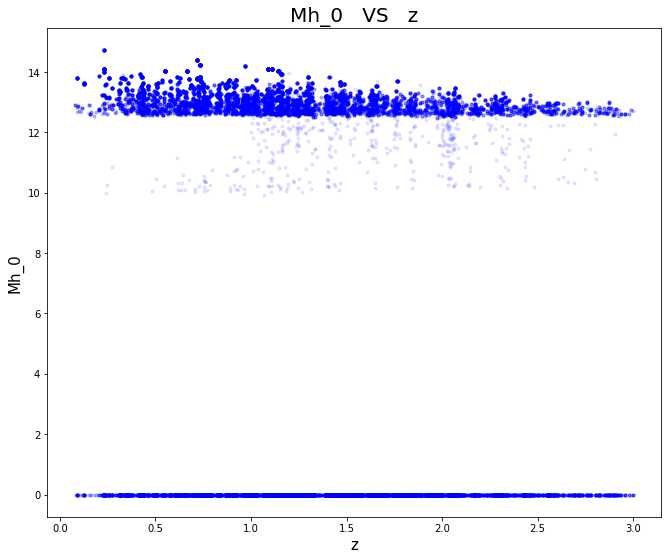

In [24]:
y = dataset['Mh_0[col9]']
x = dataset['z[4]']

x_label = x.name.split('[')[0]
y_label = y.name.split('[')[0]

plt.figure(figsize=(11,9))
plt.scatter(x, y, marker='.', c='blue', alpha=0.09)
plt.title(str(y_label)+'   VS   '+str(x_label), fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 
plt.ylabel(y_label, fontsize = 15)

<p style="color:lighcyn;font-size:1.4em;">  What is the point of M = 0?</p>

Text(0, 0.5, 'Mh_first')

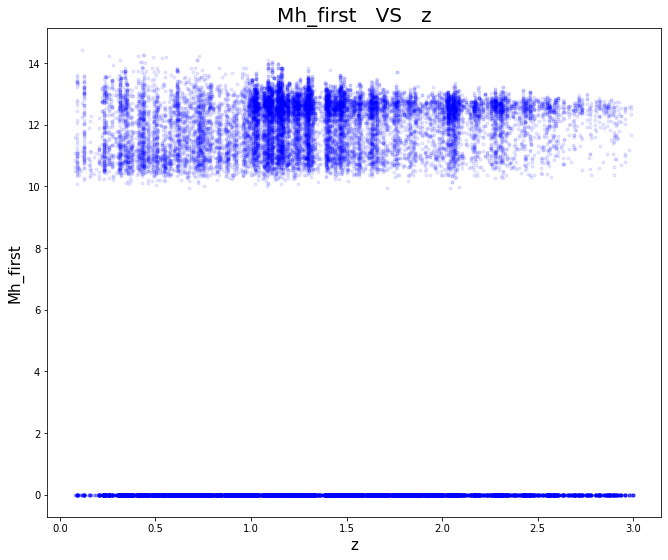

In [68]:
y = dataset['Mh_first[col24]']
x = dataset['z[4]']

x_label = x.name.split('[')[0]
y_label = y.name.split('[')[0]

plt.figure(figsize=(11,9))
plt.scatter(x, y, marker='.', c='blue', alpha=0.09)
plt.title(str(y_label)+'   VS   '+str(x_label), fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 
plt.ylabel(y_label, fontsize = 15)

Text(0, 0.5, 'Mh_0 - Mh_first')

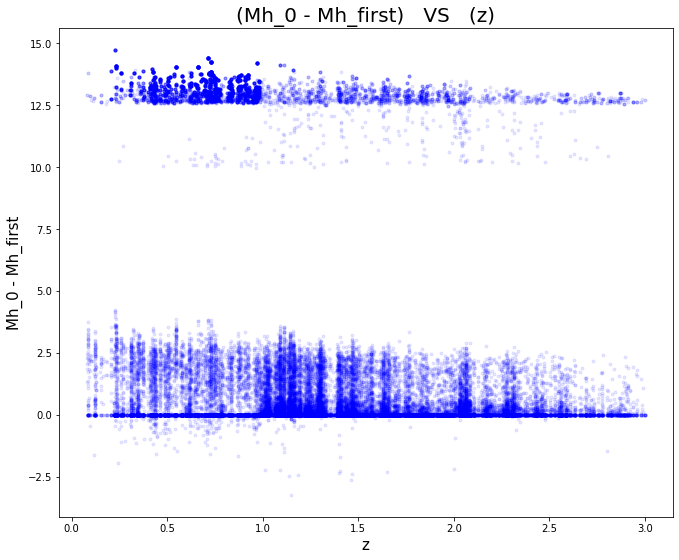

In [69]:
y1 = dataset['Mh_first[col24]']
y2 = dataset['Mh_0[col9]']
x = dataset['z[4]']

x = x
y = y2-y1

x_label = x.name.split('[')[0]
y_label = y2.name.split('[')[0] + ' - ' + y1.name.split('[')[0]

plt.figure(figsize=(11,9))
plt.scatter(x,y, marker='.', c='blue', alpha=0.09)
plt.title('(' + str(y_label)+')   VS   ('+ str(x_label) + ')', fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 
plt.ylabel(y_label, fontsize = 15)

Text(0, 0.5, 'M*_first')

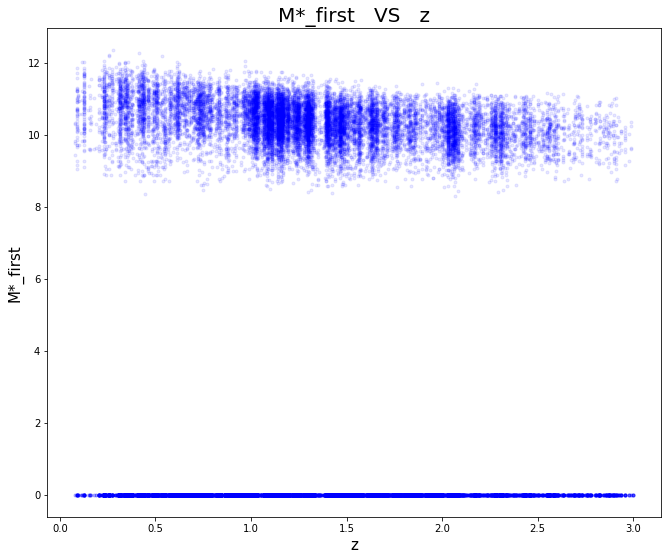

In [82]:
y = dataset['M*_first[col25]']
x = dataset['z[4]']

x_label = x.name.split('[')[0]
y_label = y.name.split('[')[0]

plt.figure(figsize=(11,9))
plt.scatter(x, y, marker='.', c='blue', alpha=0.09)
plt.title(str(y_label)+'   VS   '+str(x_label), fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 
plt.ylabel(y_label, fontsize = 15)

Text(0, 0.5, 'M*_0')

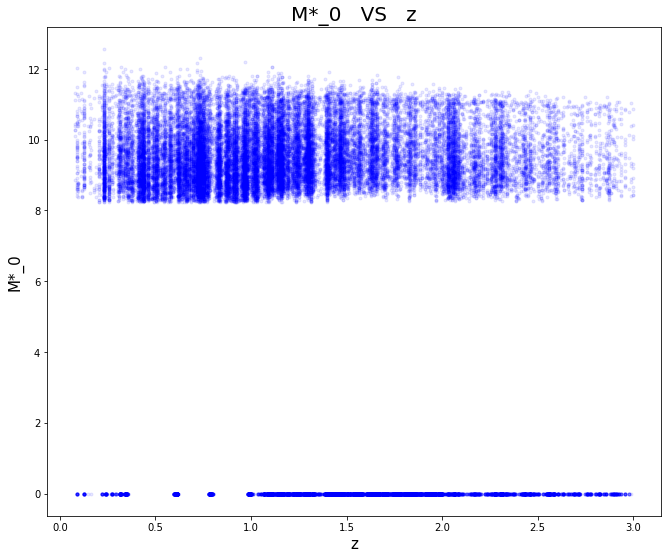

In [83]:
y = dataset['M*_0[col10]']
x = dataset['z[4]']

x_label = x.name.split('[')[0]
y_label = y.name.split('[')[0]

plt.figure(figsize=(11,9))
plt.scatter(x, y, marker='.', c='blue', alpha=0.09)
plt.title(str(y_label)+'   VS   '+str(x_label), fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 
plt.ylabel(y_label, fontsize = 15)

Text(0, 0.5, 'M*_0 - M*_first')

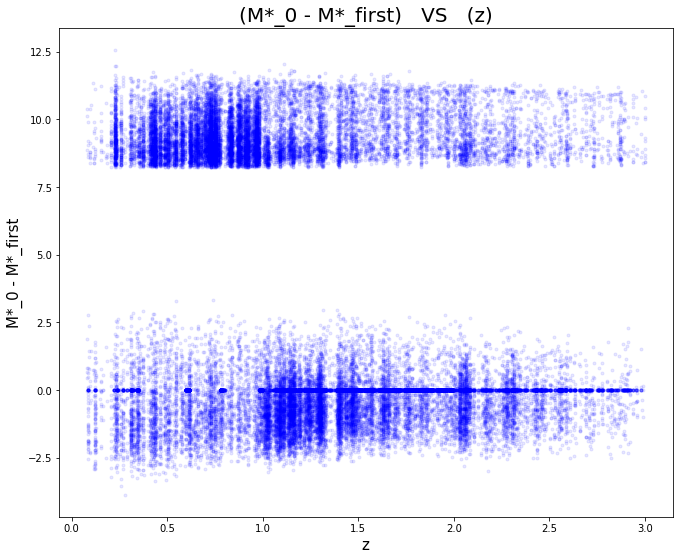

In [70]:
y1 = dataset['M*_first[col25]']
y2 = dataset['M*_0[col10]']
x = dataset['z[4]']

x = x
y = y2-y1

x_label = x.name.split('[')[0]
y_label = y2.name.split('[')[0] + ' - ' + y1.name.split('[')[0]

plt.figure(figsize=(11,9))
plt.scatter(x,y, marker='.', c='blue', alpha=0.09)
plt.title('(' + str(y_label)+')   VS   ('+ str(x_label) + ')', fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 
plt.ylabel(y_label, fontsize = 15)

Text(0, 0.5, 't(Myr)')

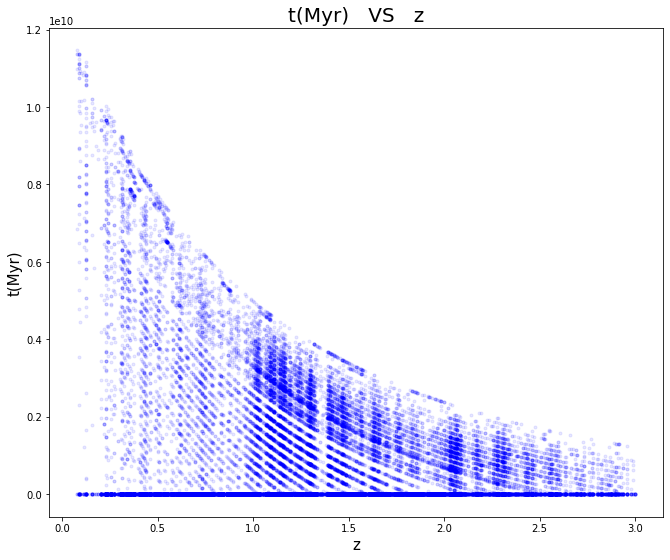

In [71]:
y = dataset['t(Myr)[col2]']
x = dataset['z[4]']

x_label = x.name.split('[')[0]
y_label = y.name.split('[')[0]

plt.figure(figsize=(11,9))
plt.scatter(x, y, marker='.', c='blue', alpha = 0.09)
plt.title(str(y_label)+'   VS   '+str(x_label), fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 
plt.ylabel(y_label, fontsize = 15)

# Plots with x-axis = z0,  zfirst, z0-zfirst

Text(0, 0.5, 'M*_0 - M*_first')

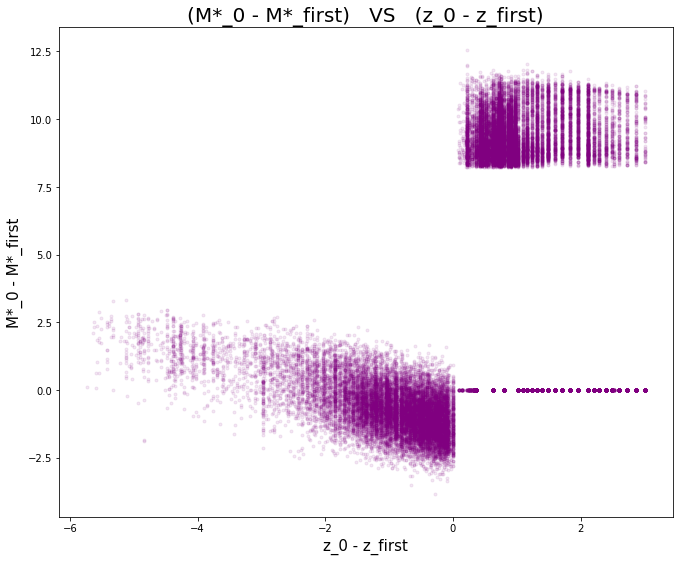

In [85]:
y1 = dataset['M*_first[col25]']
y2 = dataset['M*_0[col10]']
x1 = dataset['z_first[col20]']
x2 = dataset['z_0[col4]']

x = x2-x1
y = y2-y1

x_label = x2.name.split('[')[0] + ' - ' + x1.name.split('[')[0]
y_label = y2.name.split('[')[0] + ' - ' + y1.name.split('[')[0]

plt.figure(figsize=(11,9))
plt.scatter(x,y, marker='.', c='purple', alpha=0.09)
plt.title('(' + str(y_label)+')   VS   ('+ str(x_label) + ')', fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 
plt.ylabel(y_label, fontsize = 15)

Text(0, 0.5, 'Mh_0 - Mh_first')

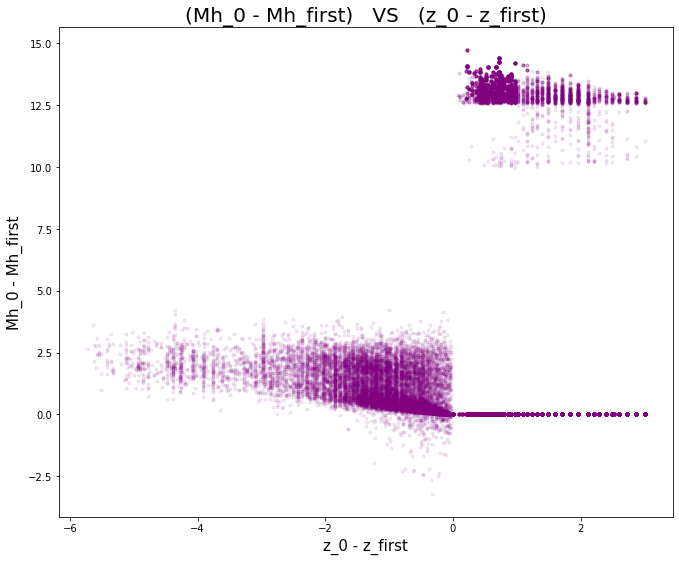

In [86]:
y1 = dataset['Mh_first[col24]']
y2 = dataset['Mh_0[col9]']
x1 = dataset['z_first[col20]']
x2 = dataset['z_0[col4]']

x = x2-x1
y = y2-y1

x_label = x2.name.split('[')[0] + ' - ' + x1.name.split('[')[0]
y_label = y2.name.split('[')[0] + ' - ' + y1.name.split('[')[0]

plt.figure(figsize=(11,9))
plt.scatter(x,y, marker='.', c='purple', alpha=0.09)
plt.title('(' + str(y_label)+')   VS   ('+ str(x_label) + ')', fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 
plt.ylabel(y_label, fontsize = 15)

Text(0, 0.5, 'SFR_0 - SFR_first')

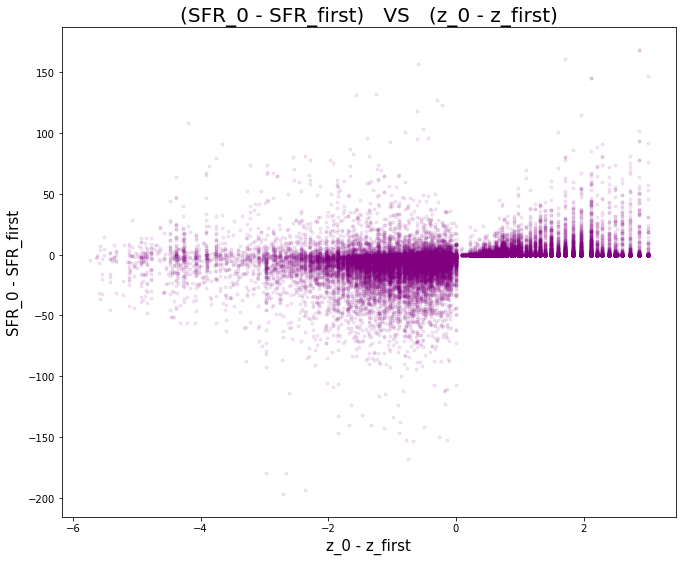

In [87]:
y1 = dataset['SFR_first[col32]']
y2 = dataset['SFR_0[col17]']
x1 = dataset['z_first[col20]']
x2 = dataset['z_0[col4]']

x = x2-x1
y = y2-y1

x_label = x2.name.split('[')[0] + ' - ' + x1.name.split('[')[0]
y_label = y2.name.split('[')[0] + ' - ' + y1.name.split('[')[0]

plt.figure(figsize=(11,9))
plt.scatter(x,y, marker='.', c='purple', alpha=0.09)
plt.title('(' + str(y_label)+')   VS   ('+ str(x_label) + ')', fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 
plt.ylabel(y_label, fontsize = 15)

Text(0, 0.5, 'Mh_0')

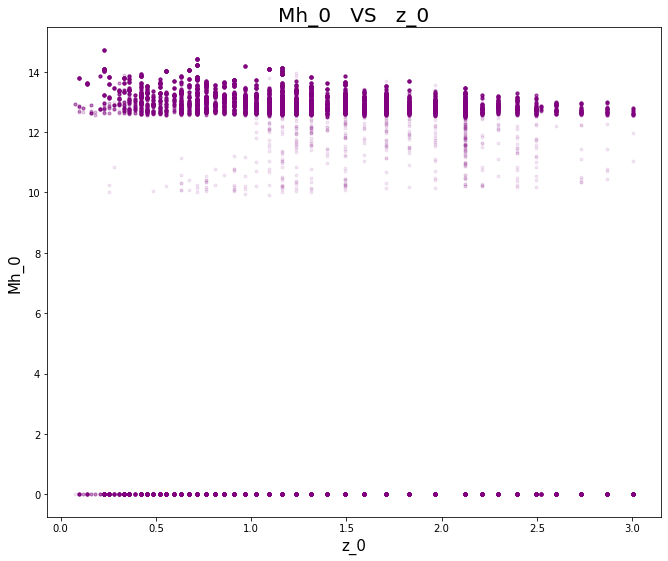

In [88]:
y = dataset['Mh_0[col9]']
x = dataset['z_0[col4]']

x_label = x.name.split('[')[0]
y_label = y.name.split('[')[0]

plt.figure(figsize=(11,9))
plt.scatter(x, y, marker='.', c='purple', alpha=0.09)
plt.title(str(y_label)+'   VS   '+str(x_label), fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 
plt.ylabel(y_label, fontsize = 15)

Text(0, 0.5, 'Mh_first')

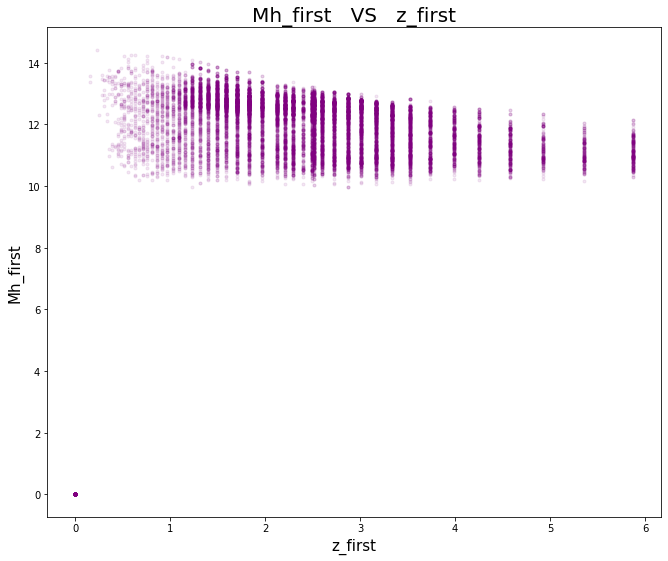

In [89]:
y = dataset['Mh_first[col24]']
x = dataset['z_first[col20]']

x_label = x.name.split('[')[0]
y_label = y.name.split('[')[0]

plt.figure(figsize=(11,9))
plt.scatter(x, y, marker='.', c='purple', alpha=0.09)
plt.title(str(y_label)+'   VS   '+str(x_label), fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 
plt.ylabel(y_label, fontsize = 15)

Text(0, 0.5, 'M*_0')

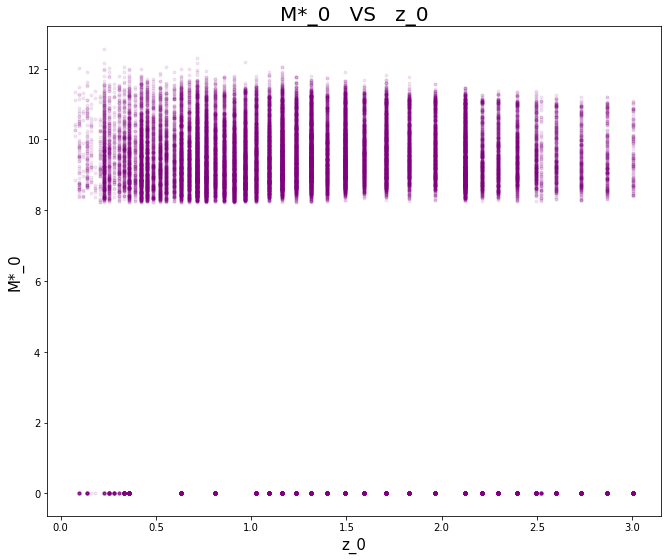

In [91]:
y = dataset['M*_0[col10]']
x = dataset['z_0[col4]']

x_label = x.name.split('[')[0]
y_label = y.name.split('[')[0]

plt.figure(figsize=(11,9))
plt.scatter(x, y, marker='.', c='purple', alpha=0.09)
plt.title(str(y_label)+'   VS   '+str(x_label), fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 
plt.ylabel(y_label, fontsize = 15)

Text(0, 0.5, 'M*_first')

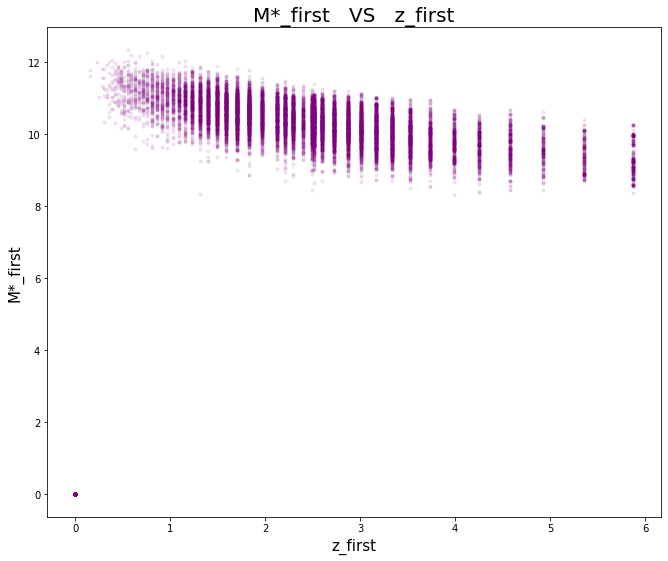

In [92]:
y = dataset['M*_first[col25]']
x = dataset['z_first[col20]']

x_label = x.name.split('[')[0]
y_label = y.name.split('[')[0]

plt.figure(figsize=(11,9))
plt.scatter(x, y, marker='.', c='purple', alpha=0.09)
plt.title(str(y_label)+'   VS   '+str(x_label), fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 
plt.ylabel(y_label, fontsize = 15)

# Plots with x-axis = t(Myr)

Text(0, 0.5, 'Mh_first')

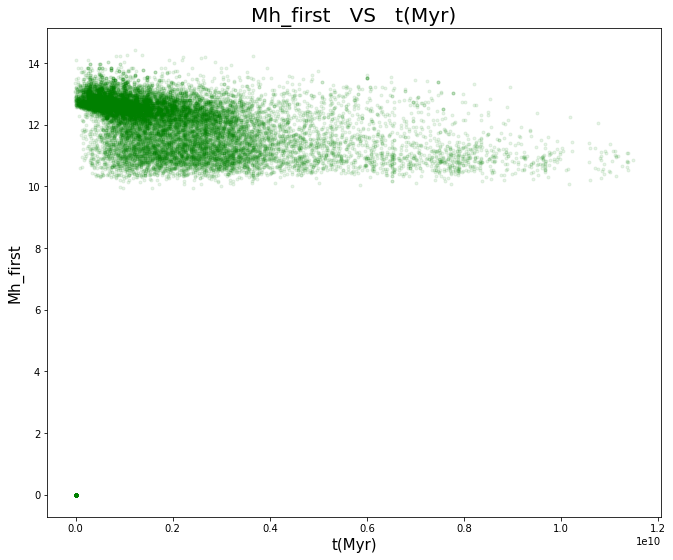

In [94]:
y = dataset['Mh_first[col24]']
x = dataset['t(Myr)[col2]']

x_label = x.name.split('[')[0]
y_label = y.name.split('[')[0]

plt.figure(figsize=(11,9))
plt.scatter(x, y, marker='.', c='green', alpha=0.09)
plt.title(str(y_label)+'   VS   '+str(x_label), fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 
plt.ylabel(y_label, fontsize = 15)

Text(0.5, 0, 't(Myr)')

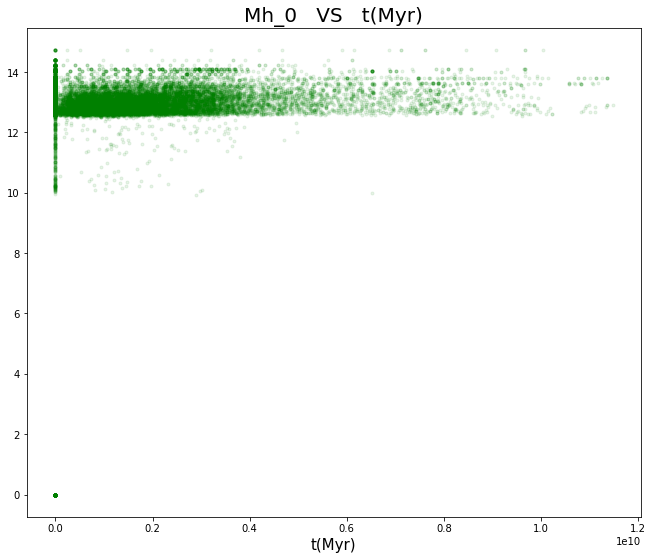

In [95]:
y = dataset['Mh_0[col9]']
x = dataset['t(Myr)[col2]']

x_label = x.name.split('[')[0]
y_label = y.name.split('[')[0]

plt.figure(figsize=(11,9))
plt.scatter(x, y, marker='.', c='green', alpha=0.09)
plt.title(str(y_label)+'   VS   '+str(x_label), fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 

(0.0, 4.0)

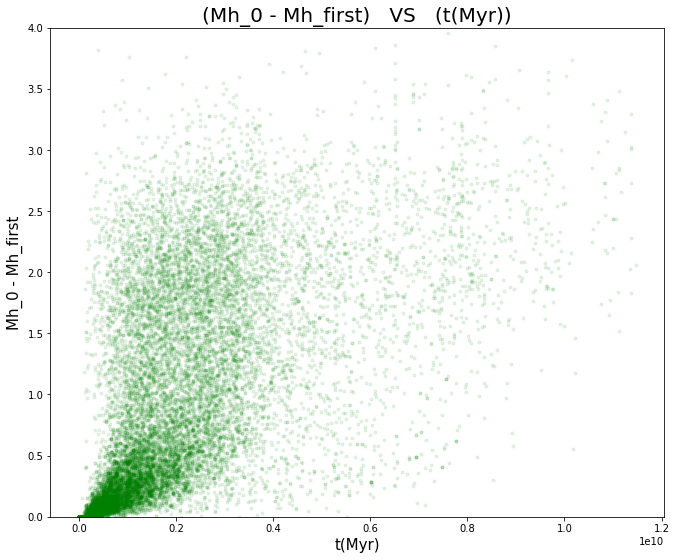

In [96]:
y1 = dataset['Mh_first[col24]']
y2 = dataset['Mh_0[col9]']
x = dataset['t(Myr)[col2]']

x = x
y = y2-y1

x_label = x.name.split('[')[0]
y_label = y2.name.split('[')[0] + ' - ' + y1.name.split('[')[0]

plt.figure(figsize=(11,9))
plt.scatter(x,y, marker='.', c='green', alpha = 0.09)
plt.title('(' + str(y_label)+')   VS   ('+ str(x_label) + ')', fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 
plt.ylabel(y_label, fontsize = 15)
plt.ylim(0,4)

Text(0.5, 0, 't(Myr)')

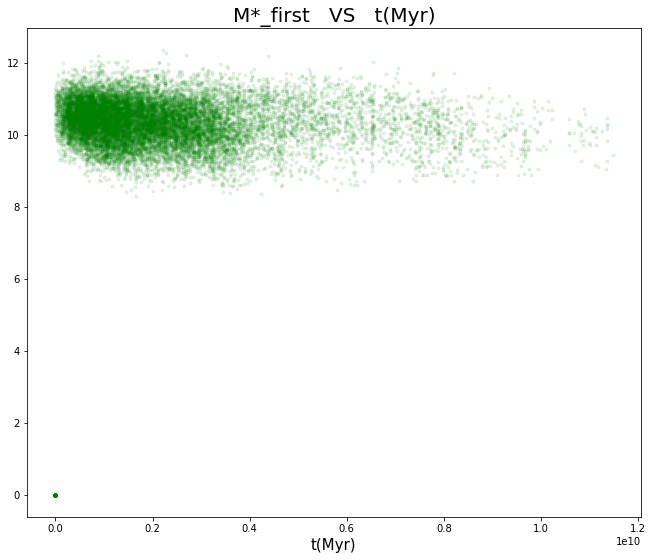

In [97]:
y = dataset['M*_first[col25]']
x = dataset['t(Myr)[col2]']

x_label = x.name.split('[')[0]
y_label = y.name.split('[')[0]

plt.figure(figsize=(11,9))
plt.scatter(x, y, marker='.', c='green', alpha=0.09)
plt.title(str(y_label)+'   VS   '+str(x_label), fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 

Text(0.5, 0, 't(Myr)')

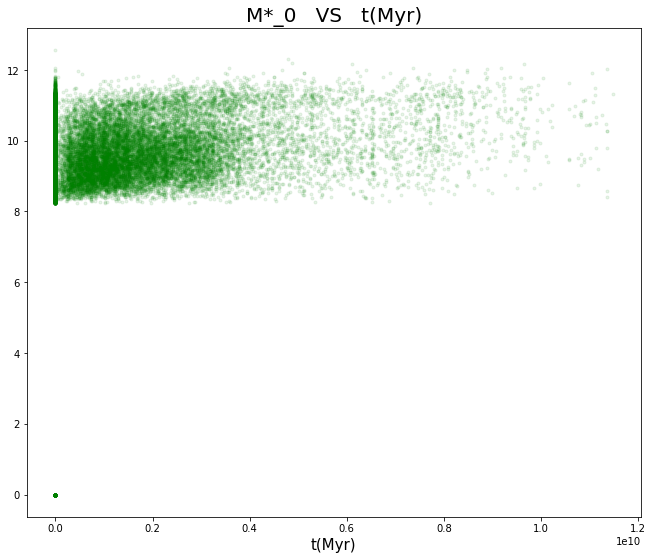

In [98]:
y = dataset['M*_0[col10]']
x = dataset['t(Myr)[col2]']

x_label = x.name.split('[')[0]
y_label = y.name.split('[')[0]

plt.figure(figsize=(11,9))
plt.scatter(x, y, marker='.', c='green', alpha=0.09)
plt.title(str(y_label)+'   VS   '+str(x_label), fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 

(0.0, 4.0)

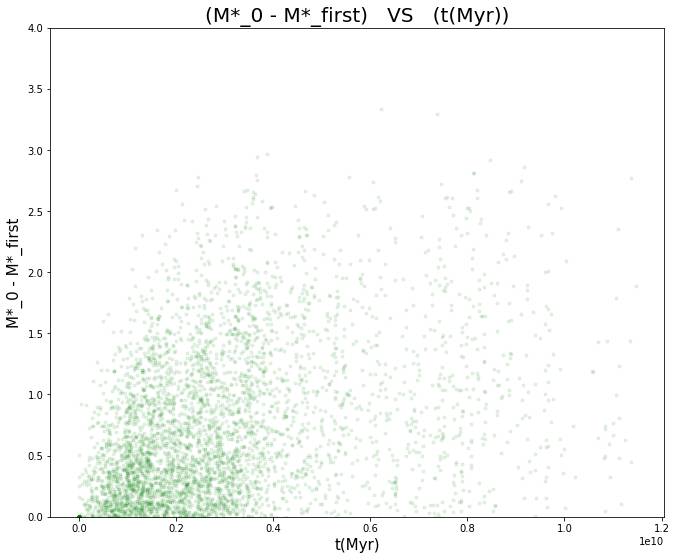

In [101]:
y1 = dataset['M*_first[col25]']
y2 = dataset['M*_0[col10]']
x = dataset['t(Myr)[col2]']

x = x
y = y2-y1

x_label = x.name.split('[')[0]
y_label = y2.name.split('[')[0] + ' - ' + y1.name.split('[')[0]

plt.figure(figsize=(11,9))
plt.scatter(x,y, marker='.', c='green', alpha = 0.09)
plt.title('(' + str(y_label)+')   VS   ('+ str(x_label) + ')', fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 
plt.ylabel(y_label, fontsize = 15)
plt.ylim(0,4)

Text(0.5, 0, 't(Myr)')

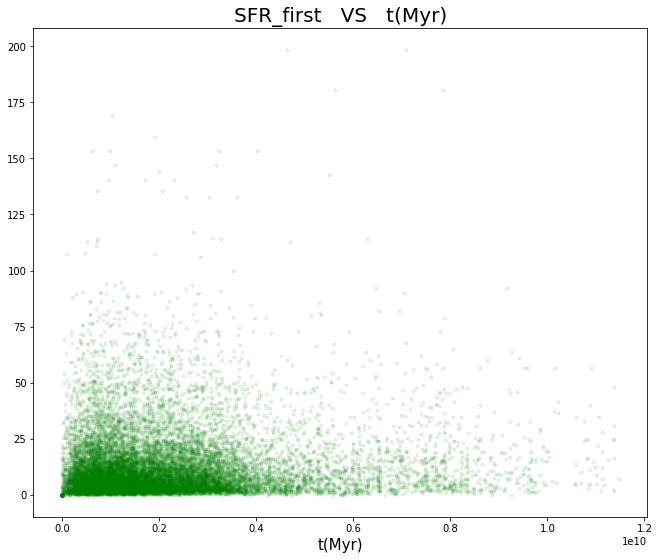

In [100]:
y = dataset['SFR_first[col32]']
x = dataset['t(Myr)[col2]']

x_label = x.name.split('[')[0]
y_label = y.name.split('[')[0]

plt.figure(figsize=(11,9))
plt.scatter(x, y, marker='.', c='green', alpha=0.09)
plt.title(str(y_label)+'   VS   '+str(x_label), fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 

Text(0.5, 0, 't(Myr)')

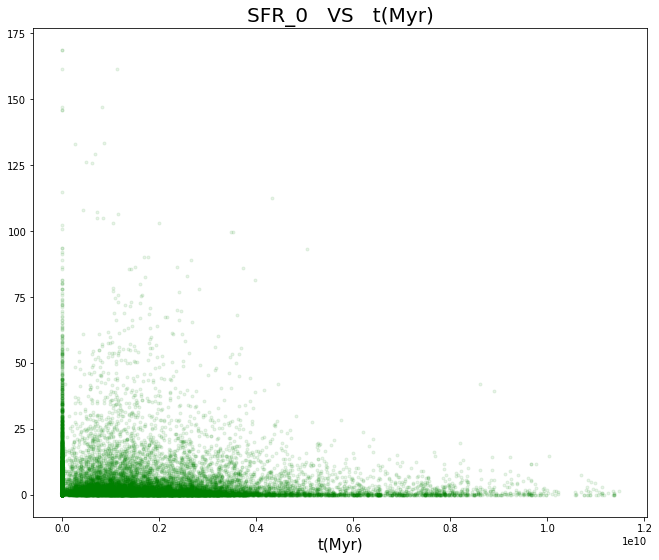

In [102]:
y = dataset['SFR_0[col17]']
x = dataset['t(Myr)[col2]']

x_label = x.name.split('[')[0]
y_label = y.name.split('[')[0]

plt.figure(figsize=(11,9))
plt.scatter(x, y, marker='.', c='green', alpha=0.09)
plt.title(str(y_label)+'   VS   '+str(x_label), fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 

Text(0, 0.5, 'SFR_0 - SFR_first')

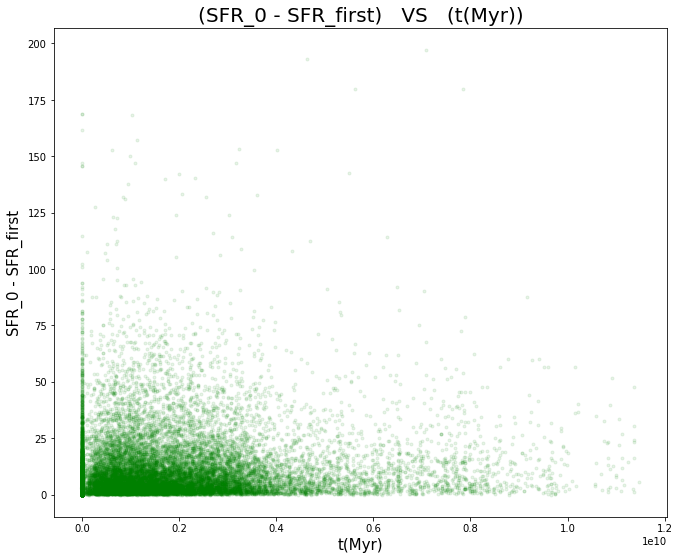

In [103]:
y1 = dataset['SFR_first[col32]']
y2 = dataset['SFR_0[col17]']
x = dataset['t(Myr)[col2]']

x = x
y = np.abs(y2-y1)

x_label = x.name.split('[')[0]
y_label = y2.name.split('[')[0] + ' - ' + y1.name.split('[')[0]

plt.figure(figsize=(11,9))
plt.scatter(x,y, marker='.', c='green', alpha=0.09)
plt.title('(' + str(y_label)+')   VS   ('+ str(x_label) + ')', fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 
plt.ylabel(y_label, fontsize = 15)

# Plots with x-axis = M0, Mfirst, M0-Mfirst

(8.0, 13.0)

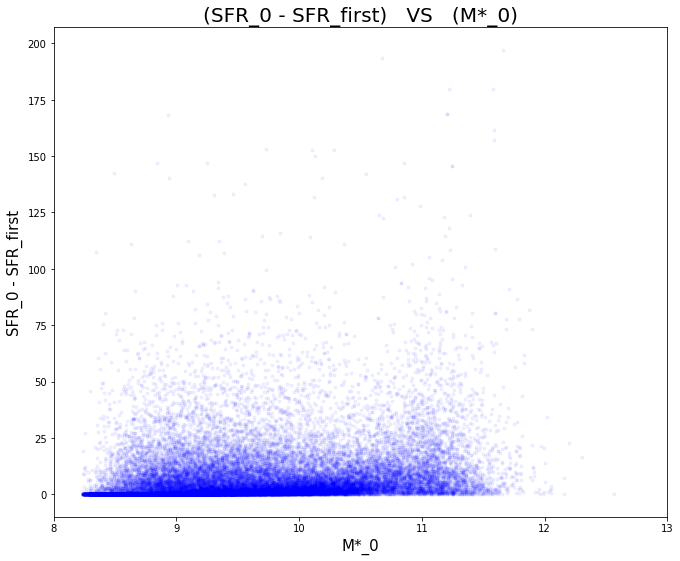

In [80]:
y1 = dataset['SFR_first[col32]']
y2 = dataset['SFR_0[col17]']
x = dataset['M*_0[col10]']

x = x
y = np.abs(y2-y1)

x_label = x.name.split('[')[0]
y_label = y2.name.split('[')[0] + ' - ' + y1.name.split('[')[0]

plt.figure(figsize=(11,9))
plt.scatter(x,y, marker='.', c='blue', alpha=0.05)
plt.title('(' + str(y_label)+')   VS   ('+ str(x_label) + ')', fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 
plt.ylabel(y_label, fontsize = 15)
plt.xlim(8,13)

Text(0, 0.5, 'SFR_0 - SFR_first')

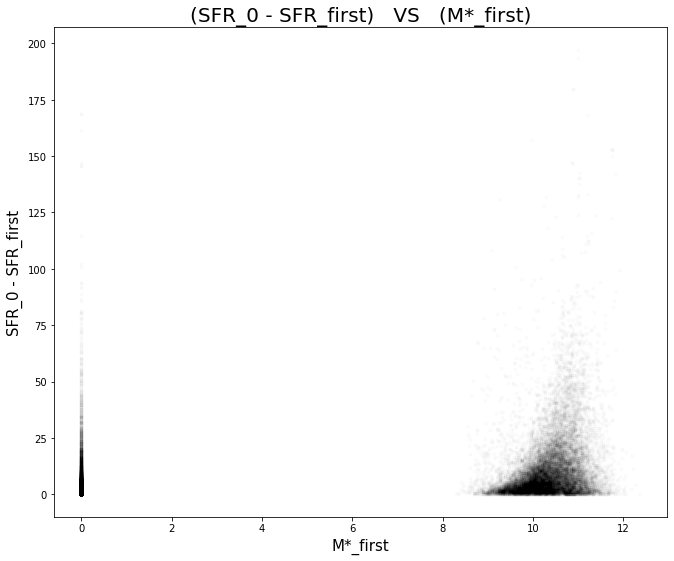

In [81]:
y1 = dataset['SFR_first[col32]']
y2 = dataset['SFR_0[col17]']
x = dataset['M*_first[col25]']

x = x
y = np.abs(y2-y1)

x_label = x.name.split('[')[0]
y_label = y2.name.split('[')[0] + ' - ' + y1.name.split('[')[0]

plt.figure(figsize=(11,9))
plt.scatter(x,y, marker='.', c='black', alpha=0.01)
plt.title('(' + str(y_label)+')   VS   ('+ str(x_label) + ')', fontsize = 20)
plt.xlabel(x_label, fontsize = 15) 
plt.ylabel(y_label, fontsize = 15)